In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import f, norm, pearsonr, ttest_rel

# Load data
study_name = "Promiscuous donors"
specification_name = "default persona"
human_file = f"{study_name} human data values anonymized.csv"
twin_file = f"{study_name} twins data values anonymized.csv"
df_human = pd.read_csv(human_file, header=0, skiprows=[1, 2])
df_twin = pd.read_csv(twin_file, header=0, skiprows=[1, 2])


# define relevant columns:
# condition variable names:
condition_vars = [""]
# Check if we have a real condition var
if condition_vars and condition_vars[0].strip():
    cond = condition_vars[0]
    cond_h = f"{cond}_human"
    cond_t = f"{cond}_twin"
    cond_exists = True
else:
    cond_exists = False

# #raw responses:
# raw_vars = [f"rating_{i}_1" for i in range(1, 11)]
# raw_vars_min = [1]*10
# raw_vars_max = [7]*10
# #raw responses: domain=social?
# raw_vars_social=[1]*10
# raw_vars_social_map = dict(zip(raw_vars, raw_vars_social))
# #raw responses: domain=cognitive?
# raw_vars_cognitive=[0]*10
# raw_vars_cognitive_map = dict(zip(raw_vars, raw_vars_cognitive))
# #raw responses: replicating know human bias?
# raw_vars_known=[0]*10
# raw_vars_known_map = dict(zip(raw_vars, raw_vars_known))
# #raw responses: preference measure?
# raw_vars_pref=[1]*10
# raw_vars_pref_map = dict(zip(raw_vars, raw_vars_pref))
# #raw responses: stimuli dependent?
# raw_vars_stim=[1]*10
# raw_vars_stim_map = dict(zip(raw_vars, raw_vars_stim))

# DVs:
DV_vars = [f"rating_{i}_1" for i in range(1, 11)]
DV_vars_min = [1] * 10
DV_vars_max = [7] * 10
# DVs: domain=social?
DV_vars_social = [1] * 10
DV_vars_social_map = dict(zip(DV_vars, DV_vars_social))
# DVs: domain=cognitive?
DV_vars_cognitive = [0] * 10
DV_vars_cognitive_map = dict(zip(DV_vars, DV_vars_cognitive))
# DVs: replicating know human bias?
DV_vars_known = [0] * 10
DV_vars_known_map = dict(zip(DV_vars, DV_vars_known))
# DVs: preference measure?
DV_vars_pref = [1] * 10
DV_vars_pref_map = dict(zip(DV_vars, DV_vars_pref))
# DVs: stimuli dependent?
DV_vars_stim = [1] * 10
DV_vars_stim_map = dict(zip(DV_vars, DV_vars_stim))
# DVs: knowledge question?
DV_vars_know = [0] * 10
DV_vars_know_map = dict(zip(DV_vars, DV_vars_know))
# DVs: political question?
DV_vars_politics = [1] * 10
DV_vars_politics_map = dict(zip(DV_vars, DV_vars_politics))

# merging key
merge_key = ["TWIN_ID"]

# Merge on TWIN_ID
df = pd.merge(df_human, df_twin, on=merge_key, suffixes=("_human", "_twin"))

# Fix dtypes
# for var in raw_vars + DV_vars:
for var in DV_vars:
    df[f"{var}_human"] = pd.to_numeric(df[f"{var}_human"], errors="coerce")
    df[f"{var}_twin"] = pd.to_numeric(df[f"{var}_twin"], errors="coerce")

# build min/max maps from both raw_vars and DV_vars
min_map = {v: mn for v, mn in zip(DV_vars, DV_vars_min)}
# min_map = {v: mn for v, mn in zip(raw_vars,      raw_vars_min)}
# min_map.update({v: mn for v, mn in zip(DV_vars,   DV_vars_min)})

max_map = {v: mx for v, mx in zip(DV_vars, DV_vars_max)}
# max_map = {v: mx for v, mx in zip(raw_vars,      raw_vars_max)}
# max_map.update({v: mx for v, mx in zip(DV_vars,   DV_vars_max)})

# now add _min and _max columns for every variable in the union
for var in min_map:
    df[f"{var}_min"] = min_map[var]
    df[f"{var}_max"] = max_map[var]

# Compute results
results = []
# for var in raw_vars:
#     col_h = f"{var}_human"
#     col_t = f"{var}_twin"
#     min_col = f"{var}_min"
#     max_col = f"{var}_max"
#     if cond_exists:
#         cols = [col_h, col_t, cond_h, cond_t,min_col,max_col]
#     else:
#         cols = [col_h, col_t,min_col,max_col]
#     pair = (
#     df[cols]
#       .dropna(subset=[col_h, col_t])
#     )
#     min_val = pair[min_col].iloc[0]
#     max_val = pair[max_col].iloc[0]
#     n    = len(pair)
#     if n >= 4:
#         r, _    = pearsonr(pair[col_h], pair[col_t])
#         z_f     = np.arctanh(r)
#         se      = 1 / np.sqrt(n - 3)
#         z_crit  = norm.ppf(0.975)
#         lo_z, hi_z = z_f - z_crit*se, z_f + z_crit*se
#         lo_r, hi_r = np.tanh(lo_z), np.tanh(hi_z)
#         z_score    = z_f / se
#         # Accuracy = mean absolute diff / range
#         if pd.isna(min_val) or pd.isna(max_val) or max_val == min_val:
#             accuracy = np.nan
#         else:
#             # compute mean absolute difference
#             abs_diff      = np.abs(pair[col_h] - pair[col_t])
#             mean_abs_diff = abs_diff.mean()
#             accuracy      = 1 - mean_abs_diff / (max_val - min_val)

#         mean_h = pair[col_h].mean()
#         mean_t = pair[col_t].mean()

#         # Paired t‐test
#         t_stat, p_val = ttest_rel(pair[col_h], pair[col_t])

#         std_h = pair[col_h].std(ddof=1)
#         std_t = pair[col_t].std(ddof=1)

#          # F‐test for equal variances
#         df1 = df2 = n - 1
#         f_stat = (std_h**2 / std_t**2) if std_t>0 else np.nan

#         # two‐tailed p‐value:
#         if not np.isnan(f_stat):
#             p_f = 2 * min(f.cdf(f_stat, df1, df2),
#                           1 - f.cdf(f_stat, df1, df2))
#         else:
#             p_f = np.nan

#         # Effect sizes (Cohen's d) across conditions
#         #    For humans:
#         if cond_exists and len(pair)>3:
#             levels_h = pair[cond_h].unique()
#             if len(levels_h) == 2:
#                 g1 = pair.loc[pair[cond_h]==levels_h[0], col_h]
#                 g2 = pair.loc[pair[cond_h]==levels_h[1], col_h]
#                 n1, n2 = len(g1), len(g2)
#                 # pooled sd
#                 s_pool = np.sqrt(((n1-1)*g1.var(ddof=1)+(n2-1)*g2.var(ddof=1)) / (n1+n2-2))
#                 d_human = (g1.mean() - g2.mean()) / s_pool if s_pool>0 else np.nan
#             else:
#                 d_human = np.nan
#         else:
#             d_human = np.nan

#         #    For twins:
#         if cond_exists and len(pair)>3:
#             levels_t = pair[cond_t].unique()
#             if cond_exists and len(levels_t) == 2:
#                 g1 = pair.loc[pair[cond_t]==levels_t[0], col_t]
#                 g2 = pair.loc[pair[cond_t]==levels_t[1], col_t]
#                 n1, n2 = len(g1), len(g2)
#                 s_pool = np.sqrt(((n1-1)*g1.var(ddof=1)+(n2-1)*g2.var(ddof=1)) / (n1+n2-2))
#                 d_twin = (g1.mean() - g2.mean()) / s_pool if s_pool>0 else np.nan
#             else:
#                 d_twin = np.nan
#         else:
#             d_twin = np.nan
#     else:
#         r = lo_r = hi_r = z_score = accuracy = mean_h = mean_t = t_stat = p_val = std_h = std_t = f_stat = p_f = np.nan
#         d_human = d_twin = np.nan


#     results.append({
#         'study name': study_name,
#         'variable name': var,
#         'variable type (raw response/DV)':     'raw',
#         'correlation between the responses from humans vs. their twins':        r,
#         'CI_lower': lo_r,
#         'CI_upper': hi_r,
#         'z-score for correlation between humans vs. their twins':  z_score,
#         'accuracy between humans vs. their twins': accuracy,
#         'mean_human': mean_h,
#         'mean_twin': mean_t,
#         'paired t-test t-stat': t_stat,
#         'paired t-test p-value': p_val,
#         'std_human': std_h,
#         'std_twin': std_t,
#         'variance test F-stat': f_stat,
#         'variance test p-value': p_f,
#         'effect size based on human': d_human,
#         'effect size based on twin': d_twin,
#         'domain=social?':raw_vars_social_map.get(var, np.nan),
#         'domain=cognitive?':raw_vars_cognitive_map.get(var, np.nan),
#         'replicating know human bias?':raw_vars_known_map.get(var, np.nan),
#         'preference measure?':raw_vars_pref_map.get(var, np.nan),
#         'stimuli dependent?':raw_vars_stim_map.get(var, np.nan),
#         'sample size':        n
#     })

for var in DV_vars:
    col_h = f"{var}_human"
    col_t = f"{var}_twin"
    min_col = f"{var}_min"
    max_col = f"{var}_max"
    if cond_exists:
        cols = [col_h, col_t, cond_h, cond_t, min_col, max_col]
    else:
        cols = [col_h, col_t, min_col, max_col]
    pair = df[cols].dropna(subset=[col_h, col_t])
    min_val = pair[min_col].iloc[0]
    max_val = pair[max_col].iloc[0]
    n = len(pair)
    if n >= 4:
        r, _ = pearsonr(pair[col_h], pair[col_t])
        z_f = np.arctanh(r)
        se = 1 / np.sqrt(n - 3)
        z_crit = norm.ppf(0.975)
        lo_z, hi_z = z_f - z_crit * se, z_f + z_crit * se
        lo_r, hi_r = np.tanh(lo_z), np.tanh(hi_z)
        z_score = z_f / se
        # Accuracy = mean absolute diff / range
        if pd.isna(min_val) or pd.isna(max_val) or max_val == min_val:
            accuracy = np.nan
        else:
            # compute mean absolute difference
            abs_diff = np.abs(pair[col_h] - pair[col_t])
            mean_abs_diff = abs_diff.mean()
            accuracy = 1 - mean_abs_diff / (max_val - min_val)

        mean_h = pair[col_h].mean()
        mean_t = pair[col_t].mean()

        # Paired t‐test
        t_stat, p_val = ttest_rel(pair[col_h], pair[col_t])

        std_h = pair[col_h].std(ddof=1)
        std_t = pair[col_t].std(ddof=1)

        # F‐test for equal variances
        df1 = df2 = n - 1
        f_stat = (std_h**2 / std_t**2) if std_t > 0 else np.nan
        # two‐tailed p‐value:
        if not np.isnan(f_stat):
            p_f = 2 * min(f.cdf(f_stat, df1, df2), 1 - f.cdf(f_stat, df1, df2))
        else:
            p_f = np.nan

        # Effect sizes (Cohen's d) across conditions
        #    For humans:
        if cond_exists and len(pair) > 3:
            levels_h = pair[cond_h].unique()
            if len(levels_h) == 2:
                g1 = pair.loc[pair[cond_h] == levels_h[0], col_h]
                g2 = pair.loc[pair[cond_h] == levels_h[1], col_h]
                n1, n2 = len(g1), len(g2)
                # pooled sd
                s_pool = np.sqrt(
                    ((n1 - 1) * g1.var(ddof=1) + (n2 - 1) * g2.var(ddof=1)) / (n1 + n2 - 2)
                )
                d_human = (g1.mean() - g2.mean()) / s_pool if s_pool > 0 else np.nan
            else:
                d_human = np.nan
        else:
            d_human = np.nan

        #    For twins:
        if cond_exists and len(pair) > 3:
            levels_t = pair[cond_t].unique()
            if cond_exists and len(levels_t) == 2:
                g1 = pair.loc[pair[cond_t] == levels_t[0], col_t]
                g2 = pair.loc[pair[cond_t] == levels_t[1], col_t]
                n1, n2 = len(g1), len(g2)
                s_pool = np.sqrt(
                    ((n1 - 1) * g1.var(ddof=1) + (n2 - 1) * g2.var(ddof=1)) / (n1 + n2 - 2)
                )
                d_twin = (g1.mean() - g2.mean()) / s_pool if s_pool > 0 else np.nan
            else:
                d_twin = np.nan
        else:
            d_twin = np.nan
    else:
        r = lo_r = hi_r = z_score = accuracy = mean_h = mean_t = t_stat = p_val = std_h = std_t = (
            f_stat
        ) = p_f = np.nan
        d_human = d_twin = np.nan

    results.append(
        {
            "study name": study_name,
            "persona specification": specification_name,
            "variable name": var,
            #        'variable type (raw response/DV)':     'DV',
            "correlation between the responses from humans vs. their twins": r,
            "CI_lower": lo_r,
            "CI_upper": hi_r,
            "z-score for correlation between humans vs. their twins": z_score,
            "accuracy between humans vs. their twins": accuracy,
            "mean_human": mean_h,
            "mean_twin": mean_t,
            "paired t-test t-stat": t_stat,
            "paired t-test p-value": p_val,
            "std_human": std_h,
            "std_twin": std_t,
            "variance test F-stat": f_stat,
            "variance test p-value": p_f,
            "effect size based on human": d_human,
            "effect size based on twin": d_twin,
            "domain=social?": DV_vars_social_map.get(var, np.nan),
            "domain=cognitive?": DV_vars_cognitive_map.get(var, np.nan),
            "replicating know human bias?": DV_vars_known_map.get(var, np.nan),
            "preference measure?": DV_vars_pref_map.get(var, np.nan),
            "stimuli dependent?": DV_vars_stim_map.get(var, np.nan),
            "knowledge question?": DV_vars_know_map.get(var, np.nan),
            "political question?": DV_vars_politics_map.get(var, np.nan),
            "sample size": n,
        }
    )

# results DataFrame
corr_df = pd.DataFrame(results)
print(corr_df)

# save output as csv - unit of observation is comparison between humans and twins:
out_file = f"{study_name} {specification_name} meta analysis.csv"
corr_df.to_csv(out_file, index=False)


#####participant-level data:
def make_long(df, respondent_type):
    # pick off TWIN_ID + the DVs, then melt
    long = df[["TWIN_ID"] + DV_vars].melt(
        id_vars="TWIN_ID", value_vars=DV_vars, var_name="variable_name", value_name="value"
    )

    long["respondent_type"] = respondent_type
    long["study_name"] = study_name
    long["specification_name"] = specification_name
    return long


# build the two halves
long_h = make_long(df_human, "human")
long_t = make_long(df_twin, "twin")

# stack them
df_long = pd.concat([long_h, long_t], ignore_index=True)

print(df_long.head())
# save output as csv - unit of observation is TWIN_ID:
out_file = f"{study_name} {specification_name} meta analysis individual level.csv"
df_long.to_csv(out_file, index=False)

print("done")

           study name persona specification variable name  \
0  Promiscuous donors       default persona    rating_1_1   
1  Promiscuous donors       default persona    rating_2_1   
2  Promiscuous donors       default persona    rating_3_1   
3  Promiscuous donors       default persona    rating_4_1   
4  Promiscuous donors       default persona    rating_5_1   
5  Promiscuous donors       default persona    rating_6_1   
6  Promiscuous donors       default persona    rating_7_1   
7  Promiscuous donors       default persona    rating_8_1   
8  Promiscuous donors       default persona    rating_9_1   
9  Promiscuous donors       default persona   rating_10_1   

   correlation between the responses from humans vs. their twins  CI_lower  \
0                                           0.416939              0.357933   
1                                           0.459015              0.402471   
2                                           0.402108              0.342297   
3               

C:\Users\ot2107\AppData\Local\Temp\ipykernel_23500\2527155494.py:88: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"occupation_ceo_{i}"]     = (
C:\Users\ot2107\AppData\Local\Temp\ipykernel_23500\2527155494.py:91: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"occupation_control_{i}"]     = (
C:\Users\ot2107\AppData\Local\Temp\ipykernel_23500\2527155494.py:96: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

C:\Users\ot2107\AppData\Local\Temp\ipykernel_23500\2527155494.py:121: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_human['participant_type']     = 'human'
C:\Users\ot2107\AppData\Local\Temp\ipykernel_23500\2527155494.py:122: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_twin['participant_type']      = 'twin'
C:\Users\ot2107\AppData\Local\Temp\ipykernel_23500\2527155494.py:123: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     202.5
Date:                Mon, 21 Jul 2025   Prob (F-statistic):          8.91e-320
Time:                        12:24:48   Log-Likelihood:                -29928.
No. Observations:               15980   AIC:                         5.991e+04
Df Residuals:                   15955   BIC:                         6.010e+04
Df Model:                          24                                         
Covariance Type:              cluster                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

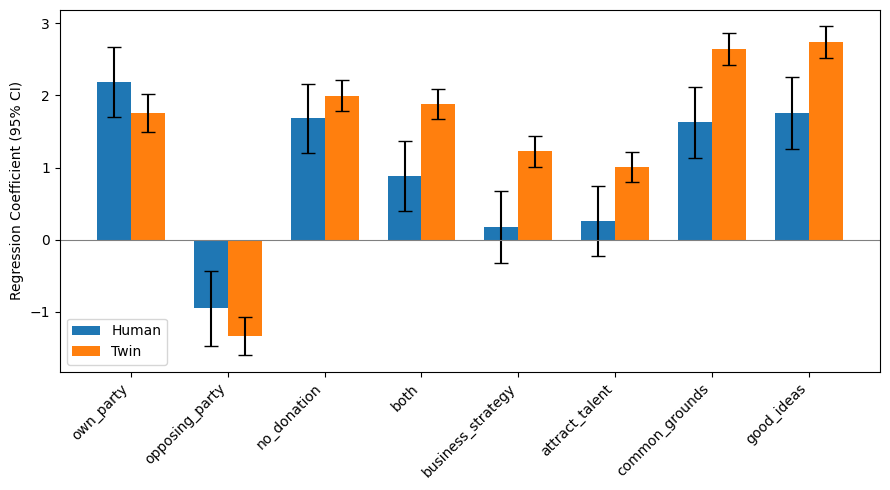

In [2]:
# replicate regression results:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# Define the conditions and choices for party assignment
party_conditions = [
    (df_human["Q315"] == 2) | (df_human["lean"] == 2),
    (df_human["Q315"] == 1) | (df_human["lean"] == 1),
]
party_choices = ["Democrat", "Republican"]

# Assign for df_human
df_human["participant_party"] = np.select(party_conditions, party_choices, default="Independent")

# Now do the same for df_twin
party_conditions = [
    (df_twin["Q315"] == 2) | (df_twin["lean"] == 2),
    (df_twin["Q315"] == 1) | (df_twin["lean"] == 1),
]

df_twin["participant_party"] = np.select(party_conditions, party_choices, default="Independent")


# define your donation‐text conditions
donation_texts = {
    "no_donation": "I currently don't donate to any politician",
    "both": "I currently donate to both Democrats and Republicans",
    "business_strategy": "I currently donate to both Democrats and Republicans so my business can work well with whoever wins",
    "attract_talent": "I currently donate to both Democrats and Republicans because it helps me attract top talent for my business",
    "common_grounds": "I currently donate to both Democrats and Republicans because I believe in working across the aisle to find common grounds",
    "good_ideas": "I currently donate to both Democrats and Republicans because I support candidates who have good ideas, regardless of which party they come from",
}

for df in (df_human, df_twin):
    for i in range(1, 11):
        pcol = "participant_party"
        dcol = f"donation_{i}"

        # own_party vs opposing_party
        df[f"own_party_{i}"] = (
            ((df[pcol] == "Democrat") & (df[dcol] == "I currently only donate to Democrats"))
            | ((df[pcol] == "Republican") & (df[dcol] == "I currently only donate to Republicans"))
        ).astype(int)

        df[f"opposing_party_{i}"] = (
            ((df[pcol] == "Democrat") & (df[dcol] == "I currently only donate to Republicans"))
            | ((df[pcol] == "Republican") & (df[dcol] == "I currently only donate to Democrats"))
        ).astype(int)

        # the rest of the donation‐based flags
        df[f"no_donation_{i}"] = (df[dcol] == donation_texts["no_donation"]).astype(int)
        df[f"both_{i}"] = (df[dcol] == donation_texts["both"]).astype(int)
        df[f"business_strategy_{i}"] = (df[dcol] == donation_texts["business_strategy"]).astype(int)
        df[f"attract_talent_{i}"] = (df[dcol] == donation_texts["attract_talent"]).astype(int)
        df[f"common_grounds_{i}"] = (df[dcol] == donation_texts["common_grounds"]).astype(int)
        df[f"good_ideas_{i}"] = (df[dcol] == donation_texts["good_ideas"]).astype(int)

        # --- PARTY DUMMIES ---
        #   df[f"target_party_democrat_{i}"]     = (df[f"party_{i}"] == "Democrat").astype(int)
        #  df[f"target_party_republican_{i}"]   = (df[f"party_{i}"] == "Republican").astype(int)

        # --- TARGET PARTY MATCHING DUMMIES ---
        df[f"target_party_own_{i}"] = (
            ((df[f"party_{i}"] == "Democrat") & (df["participant_party"] == "Democrat"))
            | ((df[f"party_{i}"] == "Republican") & (df["participant_party"] == "Republican"))
        ).astype(int)

        df[f"target_party_opposing_{i}"] = (
            ((df[f"party_{i}"] == "Democrat") & (df["participant_party"] == "Republican"))
            | ((df[f"party_{i}"] == "Republican") & (df["participant_party"] == "Democrat"))
        ).astype(int)

        # --- OCCUPATION DUMMIES ---
        df[f"occupation_founder_{i}"] = (
            df[f"occupation_{i}"] == "is the founder of a fast-growing start-up."
        ).astype(int)
        df[f"occupation_ceo_{i}"] = (
            df[f"occupation_{i}"] == "is the CEO of a publicly traded company."
        ).astype(int)
        df[f"occupation_control_{i}"] = (
            df[f"occupation_{i}"]
            == "enjoys spending weekends reading, watching movies, and spending time with friends."
        ).astype(int)

        # --- HISTORY DUMMIES ---
        df[f"history_never_{i}"] = (
            df[f"history_{i}"] == "never used to donate to politicians"
        ).astype(int)
        df[f"history_only_democrats_{i}"] = (
            df[f"history_{i}"] == "used to only donate to Democrats"
        ).astype(int)
        df[f"history_only_republicans_{i}"] = (
            df[f"history_{i}"] == "used to only donate to Republicans"
        ).astype(int)
        df[f"history_both_parties_{i}"] = (
            df[f"history_{i}"] == "used to donate to politicians from both parties"
        ).astype(int)


# write out df_human
df_human.to_csv("df_human_processed for regression.csv", index=False)

# write out df_twin
df_twin.to_csv("df_twin_processed for regression.csv", index=False)


# --- LOAD / COMBINE DATA ---

# label each
df_human["participant_type"] = "human"
df_twin["participant_type"] = "twin"
df_human["participant_type_bin"] = 0
df_twin["participant_type_bin"] = 1

# bind into one DataFrame
df = pd.concat([df_human, df_twin], ignore_index=True)


# --- PIVOT WIDE→LONG (items 1–10) ---
interacted_conds = [
    # test 07/18/25
    "own_party",
    "opposing_party",
    "no_donation",
    "both",
    #    'opposing_party', 'no_donation', 'both',
    "business_strategy",
    "attract_talent",
    "common_grounds",
    "good_ideas",
]

main_only_conds = [
    "target_party_own",
    "target_party_opposing",
    #'occupation_control' as baseline
    "occupation_founder",
    "occupation_ceo",
    #'history_never' as baseline
    "history_only_democrats",
    "history_only_republicans",
    "history_both_parties",
]

cond_names = interacted_conds + main_only_conds

rows = []
for i in range(1, 11):
    # map each cond to its i‐suffix column
    stub_map = {cond: f"{cond}_{i}" for cond in cond_names}

    cols = ["TWIN_ID", "participant_type", "participant_type_bin", f"rating_{i}_1"] + list(
        stub_map.values()
    )

    tmp = df[cols].rename(
        columns={f"rating_{i}_1": "rating", **{v: k for k, v in stub_map.items()}}
    )
    tmp["item"] = i
    rows.append(tmp)

df_long = pd.concat(rows, ignore_index=True)


# --- RUN REGRESSION WITH INTERACTIONS & CLUSTERED SEs ---

formula = (
    "rating ~ participant_type_bin * ("
    + " + ".join(interacted_conds)
    + ")"
    + " + "  # then add all the main‐only dummies
    + " + ".join(main_only_conds)
)

model = smf.ols(formula, data=df_long).fit(
    cov_type="cluster", cov_kwds={"groups": df_long["TWIN_ID"]}
)

print(model.summary())


# --- PLOT COEFFICIENTS BY GROUP WITH 95% CIs ---
params = model.params
cov = model.cov_params()

human_coefs, human_se = [], []
twin_coefs, twin_se = [], []

for cond in interacted_conds:
    # human = main effect
    h_coef = params[cond]
    h_se = model.bse[cond]
    human_coefs.append(h_coef)
    human_se.append(h_se)

    # twin = main + interaction
    inter = f"participant_type_bin:{cond}"
    t_coef = h_coef + params.get(inter, 0.0)
    v_h = cov.loc[cond, cond]
    v_i = cov.loc[inter, inter]
    cov_hi = cov.loc[cond, inter]
    t_se = np.sqrt(v_h + v_i + 2 * cov_hi)

    twin_coefs.append(t_coef)
    twin_se.append(t_se)

x = np.arange(len(human_coefs))
width = 0.35

fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(x - width / 2, human_coefs, width, yerr=1.96 * np.array(human_se), capsize=5, label="Human")
ax.bar(x + width / 2, twin_coefs, width, yerr=1.96 * np.array(twin_se), capsize=5, label="Twin")

ax.axhline(0, color="gray", linewidth=0.8)
ax.set_xticks(x)
ax.set_xticklabels(interacted_conds, rotation=45, ha="right")
ax.set_ylabel("Regression Coefficient (95% CI)")
ax.legend()
plt.tight_layout()
plt.show()

In [71]:
# check distribution of dummy variables.
import pandas as pd

interacted_conds = [
    "own_party",
    "opposing_party",
    "no_donation",
    "both",
    "business_strategy",
    "attract_talent",
    "common_grounds",
    "good_ideas",
]

main_only_conds = [
    "target_party_own",
    "target_party_opposing",
    "occupation_control",
    "occupation_founder",
    "occupation_ceo",
    "history_never",
    "history_only_democrats",
    "history_only_republicans",
    "history_both_parties",
]

cond_names = interacted_conds + main_only_conds

rows = []
for i in range(1, 11):
    # map each cond to its i‐suffix column
    stub_map = {cond: f"{cond}_{i}" for cond in cond_names}

    cols = ["TWIN_ID", "participant_type", "participant_type_bin", f"rating_{i}_1"] + list(
        stub_map.values()
    )

    tmp = df[cols].rename(
        columns={f"rating_{i}_1": "rating", **{v: k for k, v in stub_map.items()}}
    )
    tmp["item"] = i
    rows.append(tmp)

df_long = pd.concat(rows, ignore_index=True)


# — 1) define your groups —
groups = {
    "occupation": ["occupation_ceo", "occupation_founder", "occupation_control"],
    #    'target_party':      ['target_party_own', 'target_party_opposing'],
    "history": [
        "history_never",
        "history_only_democrats",
        "history_only_republicans",
        "history_both_parties",
    ],
    "donation": [
        "own_party",
        "opposing_party",
        "no_donation",
        "both",
        "business_strategy",
        "attract_talent",
        "common_grounds",
        "good_ideas",
    ],
}

# — 2) split df_long —
dfh = df_long[df_long["participant_type"] == "human"]
dft = df_long[df_long["participant_type"] == "twin"]

for df_name, dfl in [("HUMAN", dfh), ("TWIN", dft)]:
    print(f"\n=== {df_name} ===")
    for group_name, dummy_cols in groups.items():
        print(f"\n-- Group: {group_name} --")

        # a) joint distribution
        if len(dummy_cols) == 2:
            ct = pd.crosstab(dfl[dummy_cols[0]], dfl[dummy_cols[1]])
            print("2×2 cross­tab:")
            print(ct)
        else:
            dist = dfl.groupby(dummy_cols).size().reset_index(name="count")
            print("Joint distribution:")
            print(dist.to_string(index=False))

        # b) find obs where ALL of this group == 0
        zero_mask = dfl[dummy_cols].sum(axis=1) == 0
        zero_obs = dfl.loc[zero_mask, ["TWIN_ID", "item"] + dummy_cols]

        if zero_obs.empty:
            print("✅ No observations with all-zero in this group")
        else:
            print(f"⚠️ {len(zero_obs)} obs with all-zero for {group_name}:")
            print(zero_obs.to_string(index=False))


=== HUMAN ===

-- Group: occupation --
Joint distribution:
 occupation_ceo  occupation_founder  occupation_control  count
              0                   0                   1   1373
              0                   1                   0   3349
              1                   0                   0   3268
✅ No observations with all-zero in this group

-- Group: history --
Joint distribution:
 history_never  history_only_democrats  history_only_republicans  history_both_parties  count
             0                       0                         0                     1   2648
             0                       0                         1                     0   1293
             0                       1                         0                     0   1349
             1                       0                         0                     0   2700
✅ No observations with all-zero in this group

-- Group: donation --
Joint distribution:
 own_party  opposing_party  no_donation  